In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv('//Users/llately/Desktop/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [11]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [12]:
#We find that the time data above is in "object format", which would be hard to run and process

In [13]:
data['split'].head()

0    01:05:38
1    01:06:26
2    01:06:49
3    01:06:16
4    01:06:32
Name: split, dtype: object

In [14]:
# data['split'] = pd.to_datetime(data['split'],format='%H:%M:%S').dt.time

In [15]:
data['split'].head()

0    01:05:38
1    01:06:26
2    01:06:49
3    01:06:16
4    01:06:32
Name: split, dtype: object

In [16]:
# data['final'] = pd.to_datetime(data['final'],format='%H:%M:%S').dt.time
# data['split'].head()

In [17]:
data['split']=pd.to_timedelta(data['split'])
data['final']=pd.to_timedelta(data['final'])

In [18]:
data.dtypes 

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [19]:
# Based on the result showed above we know that the attributes "split" and "final" have been converted into time type functions ready for further analysis

In [20]:
data['split_sec']=data['split'].map(lambda x:x.seconds)
data['final_sec']=data['final'].map(lambda x:x.seconds)


In [21]:
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938,7731
1,32,M,01:06:26,02:09:28,3986,7768
2,31,M,01:06:49,02:10:42,4009,7842
3,38,M,01:06:16,02:13:45,3976,8025
4,31,M,01:06:32,02:13:59,3992,8039


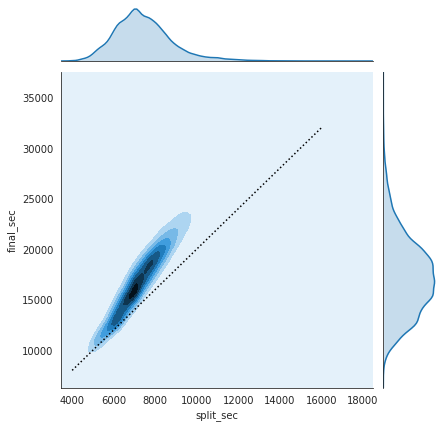

In [22]:
with sns.axes_style('white'):
    g=sns.jointplot('split_sec','final_sec',data,kind='kde')
    g.ax_joint.plot(np.linspace(4000,16000),np.linspace(8000,32000),':k')


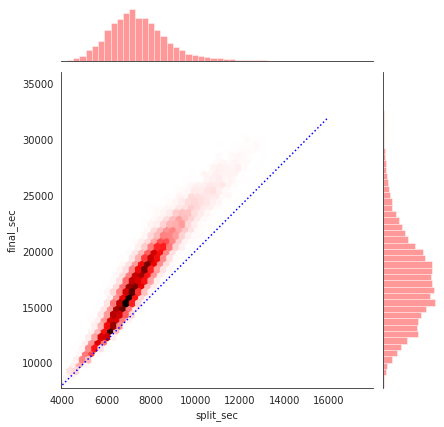

In [23]:
with sns.axes_style('white'):
    g=sns.jointplot('split_sec','final_sec',data,kind='hex',color='r')
    g.ax_joint.plot(np.linspace(4000,16000),np.linspace(8000,32000),':b')


In [24]:
#Create an attribute called split_frac to determine the half Post-acceleration situation. To show the difference beterrn the previous half and the latter half
data["split_frac"]=1-2*data['split_sec']/data['final_sec']

In [25]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938,7731,-0.018756
1,32,M,01:06:26,02:09:28,3986,7768,-0.026262
2,31,M,01:06:49,02:10:42,4009,7842,-0.022443
3,38,M,01:06:16,02:13:45,3976,8025,0.009097
4,31,M,01:06:32,02:13:59,3992,8039,0.006842


In [26]:
# If the difference between the previous and the latter half, which is "split_frac"
# If "split_frac" is smaller than 0 then he/she accelerates at the latter half
# Plot the distribution of the coefficient of difference

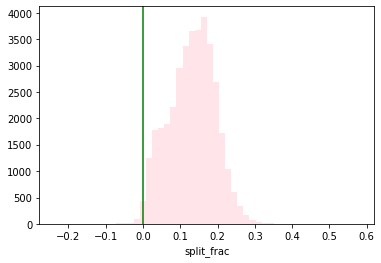

In [27]:
sns.distplot(data['split_frac'],kde=False,color='pink')
plt.axvline(0, color="g",linestyle="-")#draw the 0 line

In [28]:
sum(data['split_frac']<0)

251

In [29]:
#There are only 251 people among more than 40000 candidates who accelerates at the last half

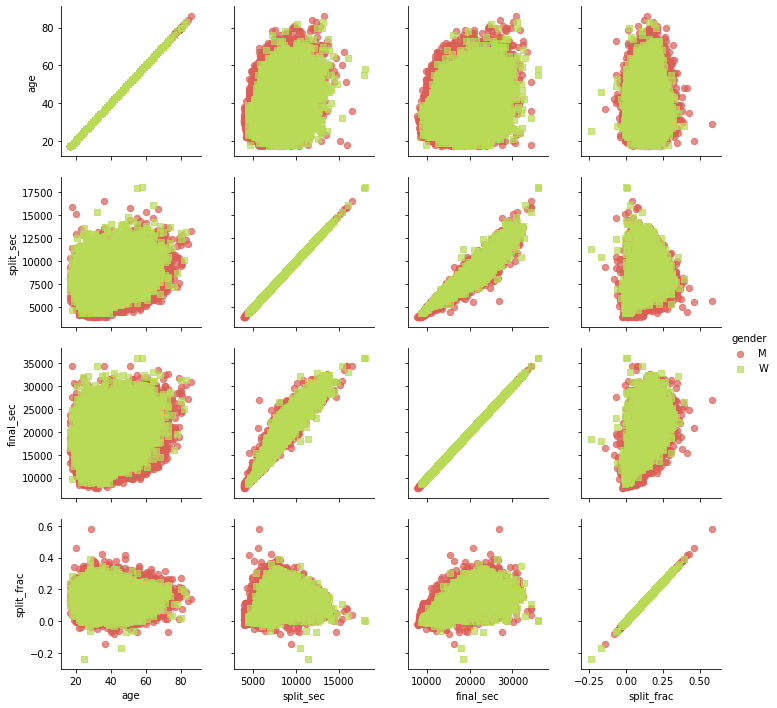

In [30]:
g=sns.PairGrid(data,vars=['age','split_sec','final_sec','split_frac'],hue='gender',palette=sns.color_palette("hls", 5),\
              hue_kws={"marker": ["o", "s"]})
g.map(plt.scatter,alpha=0.7,linewidths=1, s=40)
g.add_legend()

#Draw the mitrix pairgrid to show the possible relationship among the 'split_frac' and other

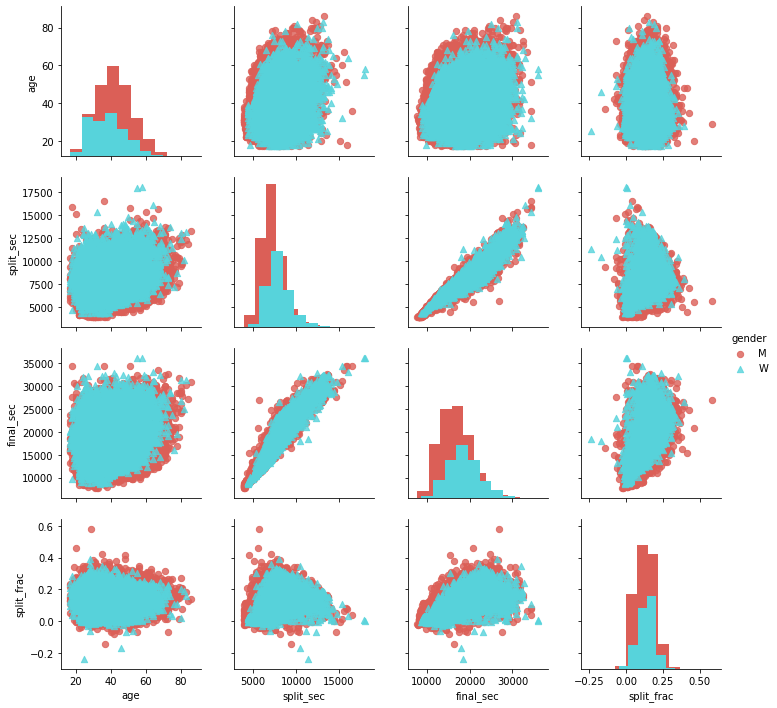

In [31]:
g=sns.PairGrid(data,vars=['age','split_sec','final_sec','split_frac'],hue='gender',palette='hls',\
              hue_kws={"marker": ["o", "^"]})
g.map_offdiag(plt.scatter,alpha=0.8,linewidths=1, s=40)#scatter chart on parts other than the diagonal
g.map_diag(plt.hist)  #hist chart on the diagonal 
g.add_legend()

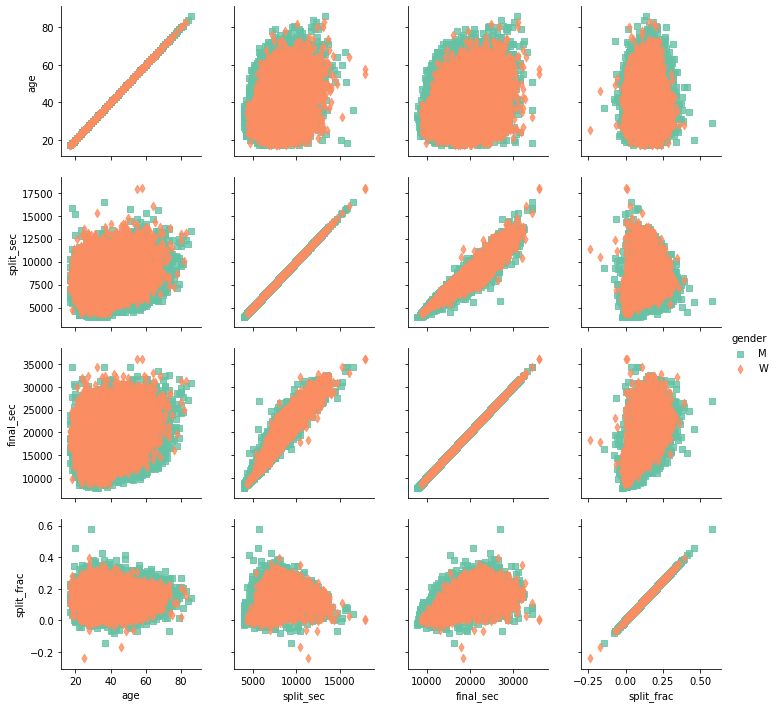

In [32]:
g=sns.PairGrid(data,vars=['age','split_sec','final_sec','split_frac'],hue='gender',\
               palette=sns.color_palette("Set2", 5),hue_kws={"marker": ["s", "d"]})
g.map(plt.scatter,alpha=0.8)
g.add_legend()

In [33]:
#As can deliver from the charts above,the split_frac had not much relationship with age
#But 'split_frac' has a strong relationship with final result which is 'final_sec'

In [34]:
#The frequency histogram of the difference coefficient between the male and female players is shown below:

(0, 10)

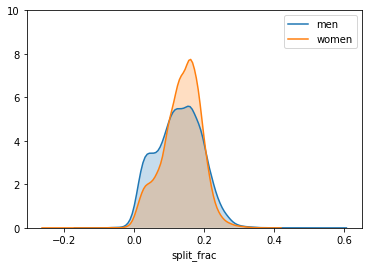

In [35]:
sns.kdeplot(data[data.gender=='M'].split_frac,label='men',shade=True)
sns.kdeplot(data[data.gender=='W'].split_frac,label='women',shade=True)
plt.xlabel('split_frac')
plt.ylim([0,10])

In [36]:
#Draw the distribution function of male and female players at different ages using violin plot:

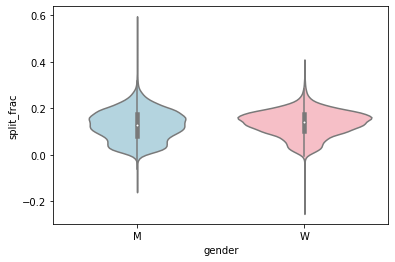

In [37]:
sns.violinplot('gender','split_frac',data=data,palette=['lightblue','lightpink'])
# the violin plot

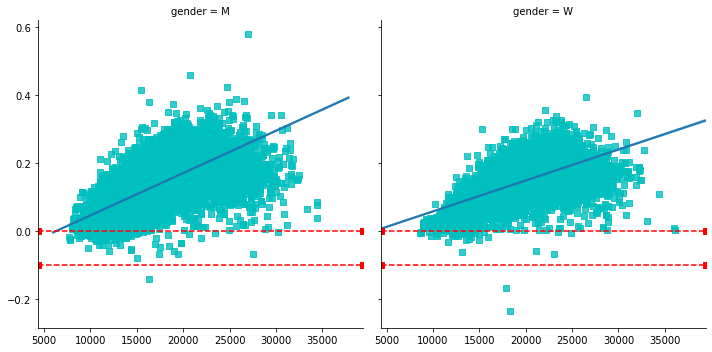

In [38]:
g=sns.lmplot('final_sec','split_frac',col='gender',data=data,\
            markers='s',scatter_kws=dict(color='c')) # Creat a regression model 
g.map(plt.axhline,y=-0.1,color='r',ls='--')
g.map(plt.axhline,y=0,color='r',ls='--')


In [39]:
#The graph above reveals the relationship between the split_frac and final result 'final_sec'
#Use lmplot to create a linear regression model

In [40]:
#It can be clearly seen from the above figure that the coefficient of difference between the first half and the first half is positively correlated with the performance of the game.
#The male players with significant acceleration in the second half have about 15,000 seconds, that is, the seed players within 4 hours
#Players below this score rarely have significant acceleration in the second half.
#Female players with significant acceleration in the second half have scores greater than 15,000 seconds, close to 20,000 seconds, mainly because the first half takes longer (too much) than the latter

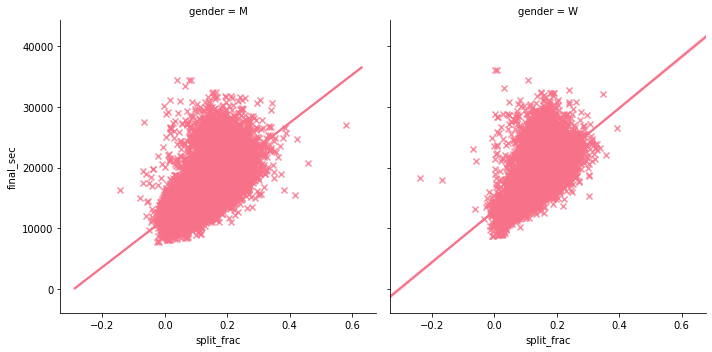

In [44]:
g = sns.lmplot(x="split_frac", y="final_sec",col="gender", data=data,markers='x',\
               palette=sns.set_palette("husl"))
#Group by gender and draw the linear regression on two seperate pictures

In [ ]:
################################################################################################################

In [ ]:
#Visualisation above mainly based on Seaborn.
# To apply in class knowledges, see the following cells:

In [53]:
#Same process to change the object data into time functions we simply run again:

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns
import datetime
from datetime import timedelta

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
data=pd.read_csv('//Users/llately/Desktop/marathon-data.csv')
data['split']=pd.to_timedelta(data['split'])
data['final']=pd.to_timedelta(data['final'])

In [55]:
data.dtypes 

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [56]:
data['split_sec']=data['split'].map(lambda x:x.seconds)
data['final_sec']=data['final'].map(lambda x:x.seconds)

In [57]:
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938,7731
1,32,M,01:06:26,02:09:28,3986,7768
2,31,M,01:06:49,02:10:42,4009,7842
3,38,M,01:06:16,02:13:45,3976,8025
4,31,M,01:06:32,02:13:59,3992,8039


In [ ]:
#Create a new csv file with revised data format

In [68]:
data['split_sec2'] = data['split'].map(lambda x:x / np.timedelta64(1, 's'))
data['final_sec2'] = data['final'].map(lambda x:x / np.timedelta64(1, 's'))

In [69]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_sec2,final_sec2
0,33,M,01:05:38,02:08:51,3938,7731,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986,7768,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009,7842,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976,8025,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992,8039,3992.0,8039.0


In [111]:
#Instruction4: Show the names of the features/attributes of your dataset
data.columns

Index(['age', 'gender', 'split', 'final', 'split_sec', 'final_sec',
       'split_sec2', 'final_sec2'],
      dtype='object')

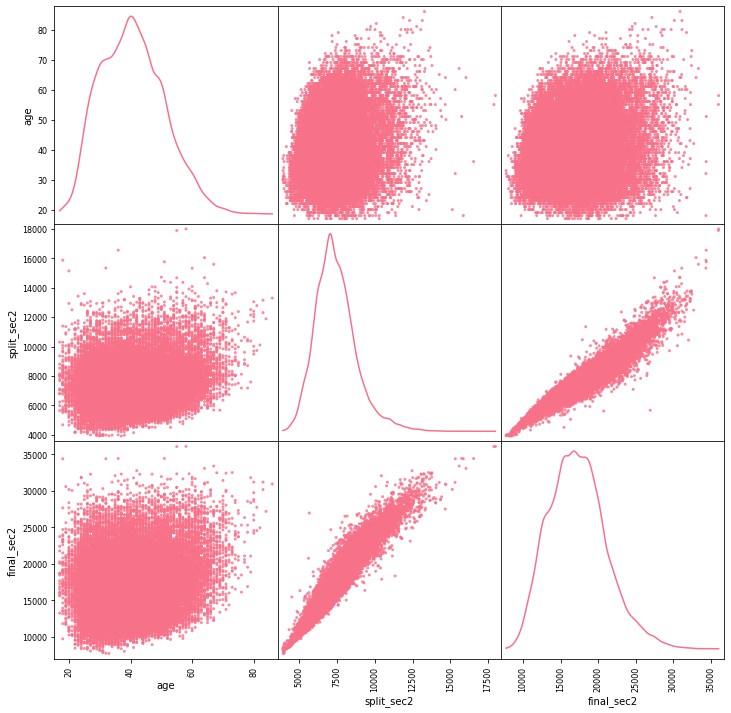

In [112]:
#Instruction5: use a SPLOM to visualize some columns of this dataset. In Panda's the SPLOM is a one-liner.
smaller_frame=data[['age', 'split_sec2', 'final_sec2']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

In [113]:
#Instruction6:Is there any strong correlation between any of the features.  Run a correlation analysis on the three features.
smaller_frame.corr()

,age,split_sec2,final_sec2
age,1.000000,0.163177,0.145993
split_sec2,0.163177,1.000000,0.955577
final_sec2,0.145993,0.955577,1.000000


In [144]:
#Instruction7: Carry out the regression, first standardizing our variables. This is strictly not necessary, but we are doing it as we wish to play around with PCA. 
from sklearn.linear_model import LinearRegression
X_HD=smaller_frame[['age', 'split_sec2']].values
X_HDn=(X_HD - X_HD.mean(axis=0))/X_HD.std(axis=0)
radius_std_vec=X_HDn[:,0]
radius_std=radius_std_vec.reshape(-1,1)
texture_std_vec=X_HDn[:,1]
texture_std=texture_std_vec.reshape(-1,1)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec)
#Instruction8: Split the data into a training set and a testing set. By default, 25% of the data is reserved for testing. 

In [146]:
#Instruction9:Use the training set for the fit, and find what our predictions ought to be on both the training and test set.
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
tests=X_test.reshape(1,-1).flatten()
print (clf1.coef_, clf1.intercept_)

[0.1655062] -0.0036548316298634204


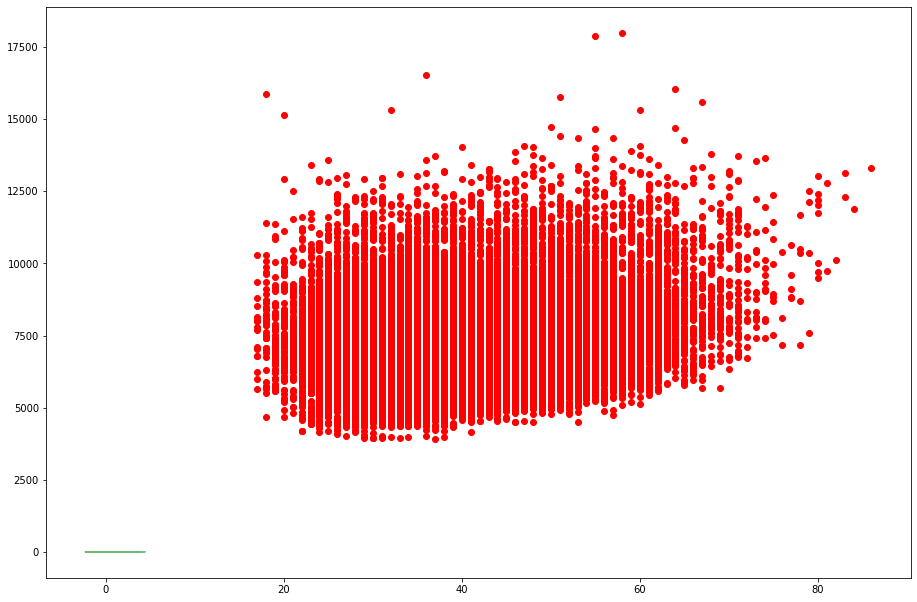

In [147]:
#Instruction10: Plot the scatter against the fit for both training and test data.

plt.scatter(data['age'], data['split_sec2'],c='r')
plt.plot(trains, predicted_train, c='g', alpha=0.5)
plt.plot(tests, predicted_test, c='g', alpha=0.1)
import numpy as np
import matplotlib.pyplot 
from matplotlib.pyplot import figure
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5, 10.5)
fig.savefig('test2png.png', dpi=80)

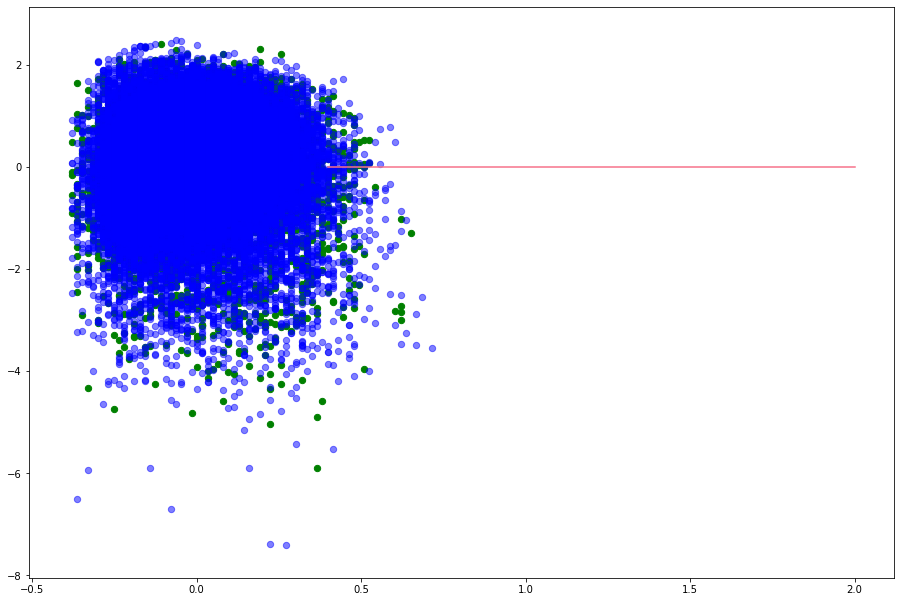

In [138]:

#Instruction11: Look at the residuals, again on both sets.

plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
plt.plot([0.4,2],[0,0])
import numpy as np
import matplotlib.pyplot 
from matplotlib.pyplot import figure
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5, 10.5)
fig.savefig('test2png.png', dpi=1000)

In [139]:
#Instruction12: Take the standarddized data and do a 2-D PCA on it. 
#Here we do not seek to accomplish a dimensional reduction, but to understand the variance structure of the data.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_HDn)
print (pca.explained_variance_ratio_)

[0.58158834 0.41841166]


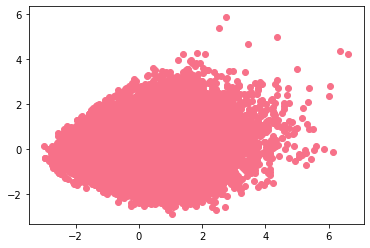

In [140]:
plt.scatter(X[:, 0], X[:, 1])
#This is to print out all the value of column 0 and 1
#By the way this is not good

In [141]:
#Instruction13: Reconstruct the original data from only the first component, setting the others to 0.

pca1 = PCA(n_components=1) # only keep one dimension!
X_E = pca1.fit_transform(X_HDn)
X_reconstructed = pca1.inverse_transform(X_E)

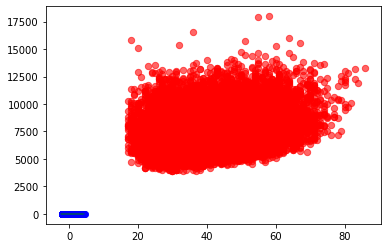

In [143]:
#Instruction14: Plot the reconstructed education(x) and income(y) from the first principal component, in blue.

plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1],c='b', s=35, alpha=0.7)
plt.scatter(data['age'], data['split_sec2'], s=40, c='r', alpha=0.6)
plt.plot(trains, predicted_train, c='g', alpha=0.3)
plt.plot(tests, predicted_test, c='g', alpha=0.3)

In [148]:
#Part2: Logistic Regression Instuctions

In [149]:
#Instruction1: Load the array
data=np.array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

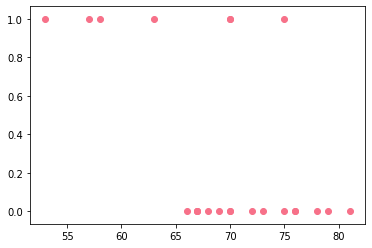

In [151]:
#Instruction2: Plot the array.

temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
axes.grid(False)
#remove_border(axes)

In [152]:
#Instruction3: Run Logistic Regression with sklearn.linear_model and set c to 1000.

from sklearn.linear_model import LogisticRegression
reg=1000.
clf4 = LogisticRegression(C=reg)
clf4.fit(temps.reshape(-1,1), pfail)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
#Instruction4: Make predictions, get the associated probabilities, and plot them.

tempsnew=np.linspace(20., 90., 15)
probs = clf4.predict_proba(tempsnew.reshape(-1,1))[:, 1]
predicts = clf4.predict(tempsnew.reshape(-1,1))

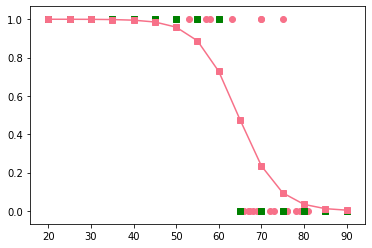

In [155]:
plt.scatter(temps, pfail)
axes=plt.gca()
axes.grid(False)
#remove_border(axes)
plt.plot(tempsnew, probs, marker='s')
plt.scatter(tempsnew, predicts, marker='s', color="green")

In [156]:
#Instruction5: use pandas crosstab to write a table of prediction vs failure on the "training" set.

pd.crosstab(pfail, clf4.predict(temps.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,16,0
1.0,3,4


In [157]:
#Part3: Bias and Variance and Cross Validation

In [163]:
# Instruction1: Load the settings needed for part3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
#rcParams['color'] = 'r'
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

In [164]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes
def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [165]:
#Instruction2: Load your dataset

import pandas as pd
df=pd.read_csv("//Users/llately/Desktop/marathon-data.csv")
print(len(df.columns))
print(len(df.index))

4
37250


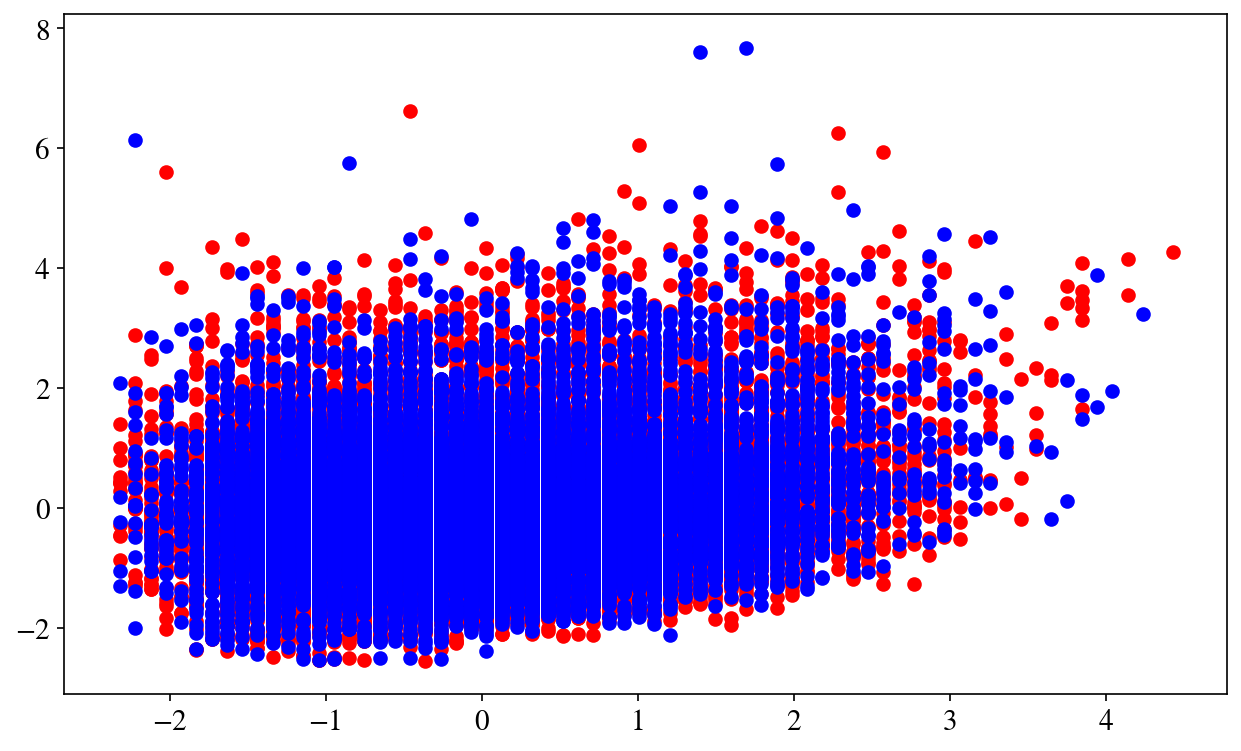

In [167]:
#Instruction3: Split the data set into equal parts test and training using the std vectors from Part1
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec)


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(radius_std, texture_std_vec, train_size=0.6)
plt.scatter(xtrain, ytrain, color='red')
plt.scatter(xtest, ytest, color='blue')

In [194]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns
import datetime
from datetime import timedelta

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
data=pd.read_csv('//Users/llately/Desktop/marathon-data.csv')
data['split']=pd.to_timedelta(data['split'])
data['final']=pd.to_timedelta(data['final'])
data['split_sec']=data['split'].map(lambda x:x.seconds)
data['final_sec']=data['final'].map(lambda x:x.seconds)
data['split_sec2'] = data['split'].map(lambda x:x / np.timedelta64(1, 's'))
data['final_sec2'] = data['final'].map(lambda x:x / np.timedelta64(1, 's'))
#data.head()
data.columns

Index(['age', 'gender', 'split', 'final', 'split_sec', 'final_sec', 'split_sec2', 'final_sec2'], dtype='object')

In [210]:
#Instruction4: Create a column called "class" and randomly add a "1", "2", or "3" for every row.
#e.g.
#featueA | Class
#--- | ---
#9 | 1
#5 | 2
#7 | 3
#6 | 2
#3 | 1
#6 | 3

data['randNumCol'] = np.random.randint(1, 4, data.shape[0])
print(data.columns)

Index(['age', 'gender', 'split', 'final', 'split_sec', 'final_sec', 'split_sec2', 'final_sec2', 'randNumCol'], dtype='object')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


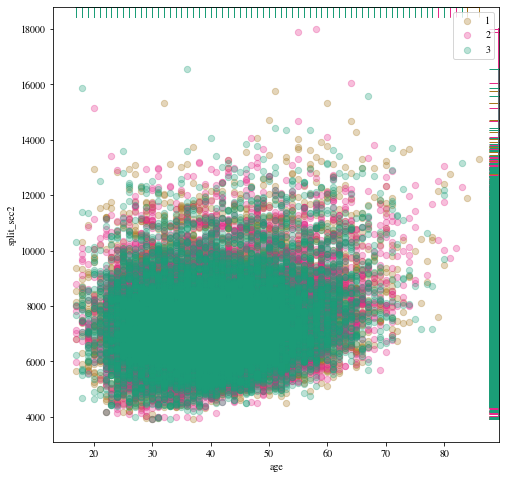

In [215]:
#Instruction5: Choose three different features in your dataset and cluster them by the randomNumCol

akeys=[1,2,3]
avals=['1','2','3']
amap={e[0]:e[1] for e in zip(akeys,avals)}
ax=scatter_by(data, 'age', 'split_sec2', by='randNumCol', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');

In [216]:
#Instructin6: Add plotting settings
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE"), clf.score(Xte, yte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax

In [219]:
#Instruction7: Develop a kNN with 20 neighbors
from sklearn.neighbors import KNeighborsClassifier
subdf=data[['age','split_sec2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
X=subdfstd.values
y=data['randNumCol'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.6)
Xtr=np.concatenate((Xtrain, Xtest))

SCORE


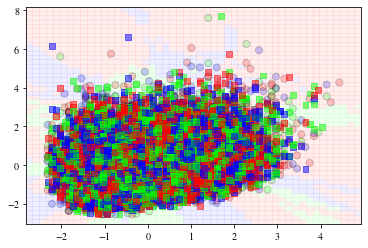

In [220]:
#Instruction8: Plot the kNN model with 20 neighbors

clf = KNeighborsClassifier(20).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

SCORE


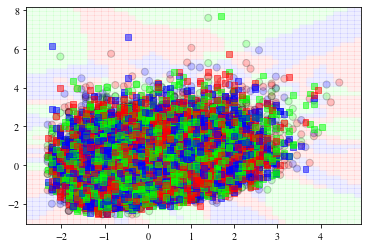

In [221]:
##Instruction9: Plot the kNN model with 1 neighbors

clf = KNeighborsClassifier(1).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

SCORE


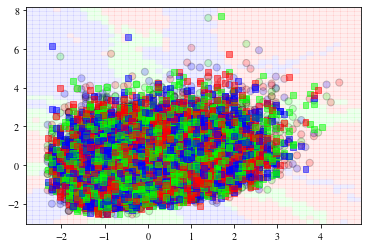

In [222]:
##Instruction10: Plot the kNN model with 35 neighbors
clf = KNeighborsClassifier(35).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

(22350,) (7450,) (7450,)
0.3346308724832215


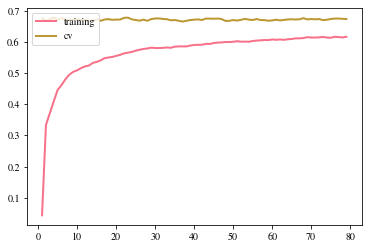

In [224]:
#Instruction#11: Develop an a KNN classifier 
Xcv,Xte,ycv,yte=train_test_split(Xtest, ytest, train_size=0.5)
print (ytrain.shape, ycv.shape, yte.shape)
trscores=[]
cvscores=[]
ns=np.arange(1,80,1)
ones=np.ones(len(ns))
for n in ns:
    clf = KNeighborsClassifier(n).fit(Xtrain, ytrain)
    trscores.append(clf.score(Xtrain, ytrain))
    cvscores.append(clf.score(Xcv, ycv))
plt.plot(ns, ones-trscores, label="training")
plt.plot(ns, ones-cvscores, label="cv")
plt.legend(loc='upper left');
print (clf.score(Xte, yte))

In [225]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
Xtr=np.concatenate((Xtrain, Xtest))

In [227]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
parameters = {"n_neighbors": np.arange(1,80,1)}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, param_grid=parameters, cv=10)
gs.fit(Xtrain, ytrain)
#print gs.grid_scores_
print (gs.best_params_, gs.best_score_)
y_true, y_pred = ytest, gs.predict(Xtest)
print(classification_report(y_true, y_pred))

{'n_neighbors': 12} 0.33741610738255035
              precision    recall  f1-score   support

           1       0.32      0.41      0.36      2436
           2       0.32      0.29      0.31      2528
           3       0.33      0.27      0.30      2486

    accuracy                           0.33      7450
   macro avg       0.33      0.33      0.32      7450
weighted avg       0.33      0.33      0.32      7450



SCORE


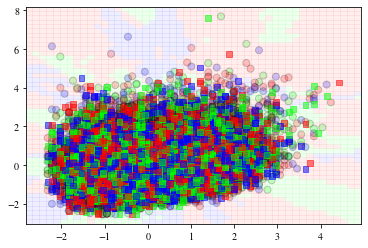

In [228]:
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, gs)

In [ ]:
###########################################################################################################

In [ ]:
#above is hw2 in my own dataset 